# SS82

Talking to Bruno about his project on stacking Swift observations and my project on Stripe82 SED we started to think about a collaboration to create a set of deep observations with Swift data. Deep Swift data being a great addition to the High-Energy end of Stripe82 data collection (see, for instance, [LaMassa,2016](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1510.00852)).

Bruno then seached for all Swift-XRT observations inside the Stripe-82:
* RA: 310 : 60
* Dec: -1.25 : 1.25

Over the Stripe, Bruno has found ~3000 observations. See ``Figure 1`` and tables ``Table 1`` and ``Table 2``.

Here, I'll do the filtering of the observations to keep only those useful for Paolo's stacking.
The selection looks for observations done within a time-range of a few days; for instance, 20 days is the window size I'll use here.

If all you want is to have a look at the final/filtered catalog, go straight to [final section](#Filtered-catalog).
Otherwise, if the code used in this filtering does matter to you, you can show them out clicking the button below.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
from IPython.display import HTML
HTML('''
<figure>
  <img src="Stripe82_gal_projection.png" alt="Swift observations over Stripe82">
  <figcaption>Figure 1: Swift observations over Stripe82</figcaption>
</figure>
''')

## The base catalog

Right below, in ``Table 1``, we can see a sample of the catalog (the first/last five lines).

In ``Table 2``, we see a brief description of the catalog.

In [1]:
import pandas
cat = pandas.read_csv('Swift_Master_Stripe82_groups.ascii',
                     delim_whitespace=True)

In [2]:
print "Table 1: Sample of the catalog"
pandas.concat([cat.head(5),cat.tail(5)])

Table 1: Sample of the catalog


,Target_Name,obsid,RA_(J2000),Dec_(J2000),start_time,processing_date,xrt_exposure,uvot_exposure,bat_exposure,archive_date,Eclip_LONG,Eclip_LAT,GroupID,GroupSize
0,SAA-COLD-185-05,74146019,59.95865,0.01190,"Jul 4, 2011 10:56:00","Jul 10, 2011",43.606,0.000,213.000,"Jul 11, 2011",57.778385,-20.129974,1.0,28.0
1,SAA-COLD-78-07,74146024,59.97165,-0.00647,"Mar 19, 2013 21:58:00","Mar 29, 2013",59.618,0.000,103.000,"Mar 30, 2013",57.787768,-20.150683,1.0,28.0
2,SAA-COLD-184-06,74146006,59.97396,-0.01571,"Jul 4, 2008 10:55:00","Oct 14, 2015",142.730,0.000,288.000,"Jul 15, 2008",57.788085,-20.160203,1.0,28.0
3,SAA-COLD-184-06,74146028,59.97467,-0.00349,"Jul 4, 2014 11:29:00","Jul 14, 2014",73.495,0.000,328.000,"Jul 15, 2014",57.791585,-20.148411,1.0,28.0
4,SAA-COLD-77-07,74146026,59.97849,0.00060,"Mar 18, 2014 23:21:00","Mar 28, 2014",72.428,0.000,160.000,"Mar 29, 2014",57.796485,-20.145224,1.0,28.0
3030,SWIFT_GAL_SURVE,44610002,284.38862,1.09587,"Mar 22, 2013 13:23:00","Apr 2, 2013",531.689,530.397,538.000,"Apr 2, 2013",285.750199,23.751873,NaN,NaN
3031,3FGLJ1903.9+005,84846001,285.97019,0.93181,"Nov 11, 2015 23:59:00","Nov 22, 2015",2817.892,2949.033,2999.000,"Nov 22, 2015",287.444088,23.409176,NaN,NaN
3032,"BURST (292.702,",680457000,292.70477,-0.66809,"Mar 25, 2016 13:01:00","Apr 4, 2016",5.078,0.000,2017.941,"Apr 5, 2016",294.396792,20.868780,NaN,NaN
3033,GRB 131127B,20329001,307.93677,0.98894,"Nov 28, 2013 10:08:00","Dec 8, 2013",4976.248,4949.621,5005.000,"Dec 9, 2013",310.621610,19.239110,NaN,NaN
3034,SWIFTJ2036.0-00,85659001,308.99192,-0.46204,"Mar 16, 2016 07:25:00","Mar 26, 2016",839.939,814.009,847.000,"Mar 27, 2016",311.296388,17.563196,NaN,NaN


In [3]:
print "Table 2: Summary of the catalog columns"
cat.describe(include='all')

Table 2: Summary of the catalog columns


//anaconda/envs/booq/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Target_Name,obsid,RA_(J2000),Dec_(J2000),start_time,processing_date,xrt_exposure,uvot_exposure,bat_exposure,archive_date,Eclip_LONG,Eclip_LAT,GroupID,GroupSize
count,3035,3.035000e+03,3035.000000,3035.000000,3035,3035,3035.000000,3035.000000,3035.000000,3035,3035.000000,3035.000000,2879.000000,2879.000000
unique,681,NaN,NaN,NaN,3035,1397,NaN,NaN,NaN,1889,NaN,NaN,NaN,NaN
top,AQLX-1,NaN,NaN,NaN,"Apr 15, 2006 16:15:00","Oct 7, 2014",NaN,NaN,NaN,"May 2, 2016",NaN,NaN,NaN,NaN
freq,278,NaN,NaN,NaN,1,45,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,1.558216e+08,186.316193,0.075929,NaN,NaN,1517.361663,1422.427248,1667.715949,NaN,186.696292,0.341681,128.784300,54.054533
std,NaN,7.351472e+08,75.843331,0.555652,NaN,NaN,2853.121293,2728.280131,2970.263464,NaN,76.034196,18.148077,77.159774,79.198817
min,NaN,2.029400e+07,59.958650,-1.266100,NaN,NaN,0.000000,0.000000,0.000000,NaN,57.778385,-24.655739,1.000000,2.000000
25%,NaN,3.372302e+07,120.540790,-0.164905,NaN,NaN,128.620000,0.000000,317.500000,NaN,122.565842,-19.251349,NaN,NaN
50%,NaN,6.801500e+07,177.673620,0.007210,NaN,NaN,686.995000,618.296000,890.000000,NaN,177.675042,-1.338063,NaN,NaN
75%,NaN,7.504200e+07,265.013060,0.572640,NaN,NaN,1742.863500,1695.957500,1805.000000,NaN,264.565893,19.920627,NaN,NaN


``Target_Name`` is the name of the (central) object at each observation, from that we see we have 681 unique sources out of the 3035 observations. ``GroupSize`` is the number of overlapping observations, the average number is ~54. Let's see how sparse are the observations in time and how do they distribute for each source.

In [4]:
cat['start_time'] = pandas.to_datetime(cat['start_time'])

In [5]:
cat_grouped_by_target = cat[['Target_Name','start_time']].groupby(['Target_Name'])

In [6]:
cat_descr = cat_grouped_by_target.describe().unstack()
cat_time = cat_descr.sort_values([('start_time','count')],ascending=False)
del cat_descr

### Number of observations

To have a glue about the number of observations done over each object we can look the counts shown by ``Table 3`` and the histogram below (``Figure 2``).

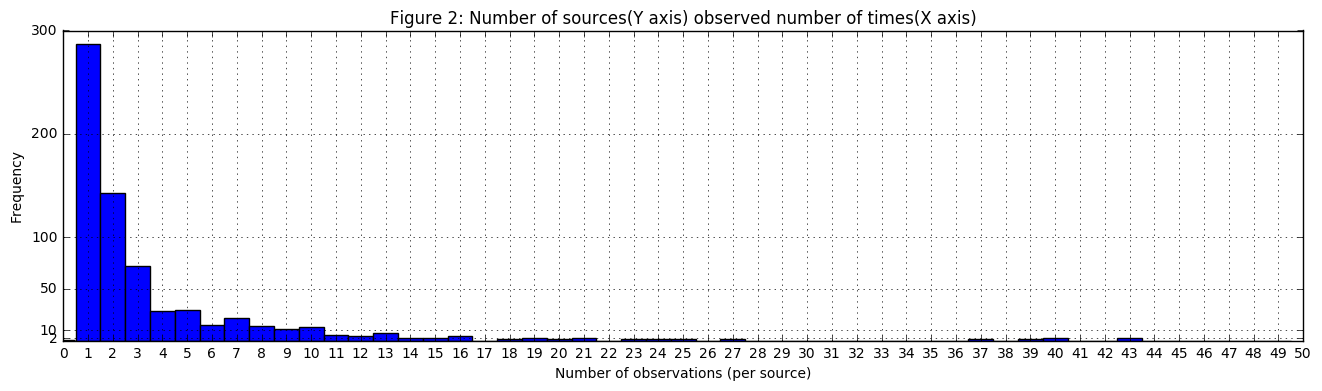

In [8]:
title = "Figure 2: Number of sources(Y axis) observed number of times(X axis)"
%matplotlib inline
from matplotlib import pyplot as plt
width = 16
height = 4
plt.figure(figsize=(width, height))
yticks = [2,10,50,100,200,300]
xticks = range(51)
ax = cat_time[('start_time','count')].plot.hist(bins=xticks,xlim=(0,50),title=title,grid=True,xticks=xticks,yticks=yticks,align='left')
ax.set_xlabel('Number of observations (per source)')

In [9]:
print "Table 3: Number counts and dates (first/last) of the observations (per object)"
cat_time

Table 3: Number counts and dates (first/last) of the observations (per object)


start_time                                   \
                     count unique                  top freq   
Target_Name                                                   
AQLX-1                 278    278  2009-11-15 03:22:00    1   
PSRJ1023+0038          123    123  2016-01-07 00:40:00    1   
ARK120                  87     87  2014-12-09 14:00:00    1   
SWIFT_GAL_SURVE         77     77  2013-03-22 13:23:00    1   
SN2007AF                55     55  2007-03-19 13:18:00    1   
PMNJ0948+0022           43     43  2012-06-18 12:03:00    1   
PS15AE                  43     43  2015-02-19 06:57:00    1   
1ES0414+009             40     40  2012-11-08 07:56:00    1   
SA101                   40     40  2009-06-30 18:48:00    1   
AEAQR                   39     39  2005-08-31 00:54:00    1   
ASASSN-15HY             37     37  2015-05-02 18:52:00    1   
ASASSN-14LP             27     27  2014-12-11 17:46:00    1   
SWIFTJ185003.2-         25     25  2011-07-01 13:32:00    1   
GRB141109A              24     24  2014-11-12 00:23:00    1   
ASASSN-16AT             23     23  2016-02-06 23:59:00    1   
2XMMJ185114.3-0         21     21  2012-06-19 17:17:00    1   
SAA-COLD-309-06         21     21  2008-02-02 08:11:00    1   
SAA-COLD-115-05         20     20  2016-05-01 20:45:00    1   
SAA-COLD-100-07         19     19  2008-08-21 09:18:00    1   
SA98OFFSET2             19     19  2014-05-15 07:07:00    1   
SA104SW                 18     18  2005-02-22 07:01:00    1   
SAA-COLD-261-07         16     16  2006-12-28 14:44:00    1   
SA104N                  16     16  2005-03-21 08:34:00    1   
3XMMJ185246.9+0         16     16  2013-08-29 00:57:00    1   
SAA-COLD-254-05         16     16  2006-12-24 12:34:00    1   
SAA-COLD-228-05         15     15  2013-08-27 09:42:00    1   
UGC4179-SN06JD          15     15  2012-09-14 16:56:00    1   
SAA-COLD-165-05         14     14  2011-06-11 17:28:00    1   
V1647ORI                14     14  2010-03-05 06:36:00    1   
SA101OFFSET1            13     13  2009-07-01 17:15:00    1   
...                    ...    ...                  ...  ...   
Q1016-006                1      1  2015-10-19 07:03:00    1   
PKSB1130+008             1      1  2011-04-22 18:23:00    1   
PKS0422+00               1      1  2010-10-18 19:20:00    1   
OGP_3888                 1      1  2016-05-21 00:04:00    1   
SAA-COLD-113-06          1      1  2013-04-23 20:12:00    1   
SAA-COLD-115-5           1      1  2010-04-25 17:40:00    1   
SAA-COLD-118-05          1      1  2012-04-27 18:19:00    1   
SAA-COLD-119-16          1      1  2009-04-29 22:25:00    1   
SAA-COLD-185-05          1      1  2011-07-04 10:56:00    1   
SAA-COLD-183-15          1      1  2006-07-02 11:19:00    1   
SAA-COLD-169-07          1      1  2015-06-18 18:55:00    1   
SAA-COLD-165-6           1      1  2006-06-14 19:34:00    1   
SAA-COLD-164-6           1      1  2006-06-13 19:27:00    1   
SAA-COLD-164-5           1      1  2010-06-13 17:29:00    1   
SAA-COLD-164-13          1      1  2009-06-13 18:44:00    1   
SAA-COLD-162-7           1      1  2005-06-11 20:23:00    1   
1A 0535+262              1      1  2005-05-29 15:39:00    1   
SAA-COLD-159-13          1      1  2009-06-08 16:33:00    1   
SAA-COLD-158-6           1      1  2005-06-07 19:53:00    1   
SAA-COLD-158-5           1      1  2009-06-07 18:08:00    1   
SAA-COLD-156-14          1      1  2010-06-05 18:28:00    1   
SAA-COLD-154-5           1      1  2005-06-03 18:00:00    1   
SAA-COLD-146-5           1      1  2006-05-26 19:16:00    1   
SAA-COLD-145-6           1      1  2005-05-25 20:05:00    1   
SAA-COLD-144-5           1      1  2005-05-24 18:26:00    1   
SAA-COLD-141-7           1      1  2005-05-21 21:27:00    1   
SAA-COLD-122-5           1      1  2010-05-02 18:19:00    1   
SAA-COLD-121-7           1      1  2005-05-01 18:48:00    1   
SAA-COLD-121-24          1      1  2006-05-01 19:37:00    1   
XTE J1752-223            1      1  2009-10-24 1

## Filtering the data

### First, a closer look to an example

To have a better idea of what we should find regarding the observation time of these sources, I'll take a particular one -- ``V1647ORI`` -- and see what we have for this source.

In [10]:
print "Table 4: Observation carried out for source 'V1647ORI' sorted in time"
g = cat_grouped_by_target.get_group('V1647ORI')
g_sorted = g.sort_values('start_time')
g_sorted

Table 4: Observation carried out for source 'V1647ORI' sorted in time


,start_time
345,2008-09-09 00:14:00
348,2008-09-10 01:55:00
337,2009-04-12 01:24:00
347,2009-09-11 09:14:00
344,2009-09-12 10:56:00
343,2009-09-13 03:00:00
346,2009-09-14 06:36:00
342,2010-02-24 05:33:00
340,2010-03-05 06:36:00
338,2015-01-05 05:00:00


If we consider each group of observations of our interest -- let me call them "chunk" -- observations that distance each other no more than "X" days (for example, X=20 days) we see from this example that it happens to exist more than one "chunk" of observations per object. Here, for instance, rows ``347,344,343,346`` and ``338,339,336,335,341`` form the cluster of observations of our interest, "chunk-1" and "chunk-2", respectively.

To select the candidates we need to run a window function over the ``'start_time'`` sorted list, where the function has two elements (i.e, observations) to ask their distance in time. If the pair of observations is less than, say 20 days, they are selected for future processing.

### Applying the filter to all objects

Now defining a 20 days window as the selection criterium to all objects in our catalog we end up with ``2254`` observations, done over ``320`` objects.
``Table 5`` add such information through column "``obs_chunk``", where "Not-Available" value means the observations that have not succeed in the filtering applied.

*Note*: ``obs_chunk`` values mean the groupings -- "chunks" -- formed within each object's set of observations. They are unique among each object's observations, but not accross the entire catalog.

In [11]:
def find_clustered_observations(sorted_target_observations,time_range=10):
    # Let's select a 'time_range' days window to select valid observations
    window_size = time_range

    g_sorted = sorted_target_observations
    
    # an ordered dictionary works as a 'set' structure
    from collections import OrderedDict
    selected_allObs = OrderedDict()

    # define en identificator for each cluster of observations, to ease future filtering
    group_obs = 1

    _last_time = None
    _last_id = None
    for _row in g_sorted.iterrows():
        ind,row = _row
        if _last_time is None:
            _last_time = row.start_time
            _last_id = ind
            continue
        _delta = row.start_time - _last_time
        if _delta.days <= window_size:
            selected_allObs[_last_id] = group_obs
            selected_allObs[ind] = group_obs
        else:
            if len(selected_allObs):
                group_obs = selected_allObs.values()[-1] + 1
        _last_time = row.start_time
        _last_id = ind

    return selected_allObs

In [12]:
from collections import OrderedDict
obs_indx = OrderedDict()
for name,group in cat_grouped_by_target:
    g_sorted = group.sort_values('start_time')
    filtered_indxs = find_clustered_observations(g_sorted,time_range=20)
    obs_indx.update(filtered_indxs)
import pandas
obsChunks_forFilteringCat = pandas.DataFrame(obs_indx.values(),columns=['obs_chunk'],index=obs_indx.keys())

In [13]:
# obsChunks_forFilteringCat.sort_index()

In [14]:
print "Table 5: original catalog with column 'obs_chunk' to flag which rows succeed the filtering (non-NA values)."
cat_with_obsChunksFlag = cat.join(obsChunks_forFilteringCat)
# cols = list(cat_with_obsChunksFlag.columns)
# cols.insert(2,cols.pop(-1))
# cat_with_obsChunksFlag = cat_with_obsChunksFlag.ix[:,cols]
cat_with_obsChunksFlag

Table 5: original catalog with column 'obs_chunk' to flag which rows succeed the filtering (non-NA values).


,Target_Name,obsid,RA_(J2000),Dec_(J2000),start_time,processing_date,xrt_exposure,uvot_exposure,bat_exposure,archive_date,Eclip_LONG,Eclip_LAT,GroupID,GroupSize,obs_chunk
0,SAA-COLD-185-05,74146019,59.95865,0.01190,2011-07-04 10:56:00,"Jul 10, 2011",43.606,0.000,213.000,"Jul 11, 2011",57.778385,-20.129974,1.0,28.0,NaN
1,SAA-COLD-78-07,74146024,59.97165,-0.00647,2013-03-19 21:58:00,"Mar 29, 2013",59.618,0.000,103.000,"Mar 30, 2013",57.787768,-20.150683,1.0,28.0,NaN
2,SAA-COLD-184-06,74146006,59.97396,-0.01571,2008-07-04 10:55:00,"Oct 14, 2015",142.730,0.000,288.000,"Jul 15, 2008",57.788085,-20.160203,1.0,28.0,1.0
3,SAA-COLD-184-06,74146028,59.97467,-0.00349,2014-07-04 11:29:00,"Jul 14, 2014",73.495,0.000,328.000,"Jul 15, 2014",57.791585,-20.148411,1.0,28.0,2.0
4,SAA-COLD-77-07,74146026,59.97849,0.00060,2014-03-18 23:21:00,"Mar 28, 2014",72.428,0.000,160.000,"Mar 29, 2014",57.796485,-20.145224,1.0,28.0,3.0
5,SAA-COLD-184-5,74146018,59.97904,0.01818,2010-07-04 12:41:00,"Jul 10, 2010",119.812,0.000,167.000,"Jul 11, 2010",57.801026,-20.128160,1.0,28.0,1.0
6,SAA-COLD-185-17,74146010,59.98036,-0.04740,2009-07-04 10:37:00,"Jul 10, 2009",158.473,0.000,250.000,"Jul 11, 2009",57.787590,-20.192529,1.0,28.0,1.0
7,SAA-COLD-76-16,74146014,59.98080,-0.00729,2010-03-17 22:05:00,"Mar 23, 2010",222.608,0.000,256.000,"Mar 24, 2010",57.797108,-20.153424,1.0,28.0,NaN
8,SAA-COLD-184-5,74146017,59.98144,-0.00241,2010-07-04 10:58:00,"Jul 10, 2010",126.487,0.000,170.000,"Jul 11, 2010",57.798876,-20.148791,1.0,28.0,1.0
9,SAA-COLD-74-8,74146008,59.98251,0.00607,2009-03-15 22:51:00,"Mar 21, 2009",166.006,0.000,225.000,"Mar 22, 2009",57.801904,-20.140731,1.0,28.0,NaN


## Filtered catalog

And here is the final catalog, where rows (i.e, observations) out of our interest are removed.
Out of our interest are the entries with an ``xrt_exposure`` shorter than ``200 seconds``
and individual observations (i.e, "obs_chunk == NaN").
This catalog is written to '``Swift_Master_Stripe82_groups_filtered.csv``'.

In [15]:
cat_filtered = cat_with_obsChunksFlag.dropna(subset=['obs_chunk'])

In [16]:
cat_filtered

,Target_Name,obsid,RA_(J2000),Dec_(J2000),start_time,processing_date,xrt_exposure,uvot_exposure,bat_exposure,archive_date,Eclip_LONG,Eclip_LAT,GroupID,GroupSize,obs_chunk
2,SAA-COLD-184-06,74146006,59.97396,-0.01571,2008-07-04 10:55:00,"Oct 14, 2015",142.730,0.000,288.0,"Jul 15, 2008",57.788085,-20.160203,1.0,28.0,1.0
3,SAA-COLD-184-06,74146028,59.97467,-0.00349,2014-07-04 11:29:00,"Jul 14, 2014",73.495,0.000,328.0,"Jul 15, 2014",57.791585,-20.148411,1.0,28.0,2.0
4,SAA-COLD-77-07,74146026,59.97849,0.00060,2014-03-18 23:21:00,"Mar 28, 2014",72.428,0.000,160.0,"Mar 29, 2014",57.796485,-20.145224,1.0,28.0,3.0
5,SAA-COLD-184-5,74146018,59.97904,0.01818,2010-07-04 12:41:00,"Jul 10, 2010",119.812,0.000,167.0,"Jul 11, 2010",57.801026,-20.128160,1.0,28.0,1.0
6,SAA-COLD-185-17,74146010,59.98036,-0.04740,2009-07-04 10:37:00,"Jul 10, 2009",158.473,0.000,250.0,"Jul 11, 2009",57.787590,-20.192529,1.0,28.0,1.0
8,SAA-COLD-184-5,74146017,59.98144,-0.00241,2010-07-04 10:58:00,"Jul 10, 2010",126.487,0.000,170.0,"Jul 11, 2010",57.798876,-20.148791,1.0,28.0,1.0
11,SAA-COLD-184-06,74146007,59.98622,-0.01296,2008-07-04 12:37:00,"Oct 14, 2015",234.707,0.000,284.0,"Jul 15, 2008",57.801470,-20.160114,1.0,28.0,1.0
12,SAA-COLD-77-07,74146025,59.98822,-0.00823,2014-03-18 21:38:00,"Mar 28, 2014",31.865,0.000,272.0,"Mar 29, 2014",57.804620,-20.155916,1.0,28.0,3.0
13,SAA-COLD-184-5,74146015,59.98907,-0.00997,2010-07-03 10:53:00,"Jul 9, 2010",70.290,0.000,251.0,"Jul 10, 2010",57.805112,-20.157796,1.0,28.0,1.0
14,SAA-COLD-185-17,74146009,59.98940,-0.03133,2009-07-03 12:11:00,"Jul 9, 2009",387.867,0.000,532.0,"Jul 10, 2009",57.800633,-20.178741,1.0,28.0,1.0


In [17]:
cat_filtered = cat_filtered.loc[cat_filtered.xrt_exposure >= 200]

In [18]:
cat_filtered

,Target_Name,obsid,RA_(J2000),Dec_(J2000),start_time,processing_date,xrt_exposure,uvot_exposure,bat_exposure,archive_date,Eclip_LONG,Eclip_LAT,GroupID,GroupSize,obs_chunk
11,SAA-COLD-184-06,74146007,59.98622,-0.01296,2008-07-04 12:37:00,"Oct 14, 2015",234.707,0.000,284.0,"Jul 15, 2008",57.801470,-20.160114,1.0,28.0,1.0
14,SAA-COLD-185-17,74146009,59.98940,-0.03133,2009-07-03 12:11:00,"Jul 9, 2009",387.867,0.000,532.0,"Jul 10, 2009",57.800633,-20.178741,1.0,28.0,1.0
28,1ES0414+009,30813032,64.15163,1.08873,2014-12-26 05:15:00,"Jan 5, 2015",1029.447,0.000,1033.0,"Jan 6, 2015",62.379521,-19.906271,2.0,42.0,10.0
29,1ES0414+009,30813018,64.16355,1.12553,2012-12-12 05:03:00,"Dec 18, 2012",949.609,921.469,955.0,"Jan 5, 2013",62.399193,-19.872299,2.0,42.0,5.0
30,1ES0414+009,30813031,64.16797,1.07709,2014-12-20 05:35:00,"Dec 30, 2014",1034.210,1004.967,600.0,"Dec 31, 2014",62.394316,-19.920724,2.0,42.0,10.0
31,1ES0414+009,30813039,64.17563,1.05207,2015-12-05 06:46:00,"Dec 15, 2015",892.597,869.041,900.0,"Dec 16, 2015",62.397417,-19.946727,2.0,42.0,12.0
32,1ES0414+009,30813040,64.17648,1.13587,2015-12-15 06:25:00,"Dec 25, 2015",950.262,925.540,956.0,"Dec 26, 2015",62.414730,-19.864519,2.0,42.0,12.0
34,1ES0414+009,30813024,64.18287,1.09408,2014-01-25 03:17:00,"Feb 4, 2014",964.609,937.963,970.0,"Feb 5, 2014",62.413220,-19.906770,2.0,42.0,8.0
35,1ES0414+009,30813020,64.18605,1.06438,2013-11-03 08:29:00,"Nov 14, 2013",874.618,847.439,880.0,"Nov 14, 2013",62.410723,-19.936548,2.0,42.0,6.0
36,1ES0414+009,30813033,64.18861,1.11183,2015-01-12 03:09:00,"Jan 22, 2015",1009.443,983.397,1014.0,"Jan 23, 2015",62.422696,-19.890381,2.0,42.0,10.0


In [19]:
cat_filtered.describe(include='all')

,Target_Name,obsid,RA_(J2000),Dec_(J2000),start_time,processing_date,xrt_exposure,uvot_exposure,bat_exposure,archive_date,Eclip_LONG,Eclip_LAT,GroupID,GroupSize,obs_chunk
count,1666,1.666000e+03,1666.000000,1666.000000,1666,1666,1666.000000,1666.000000,1666.000000,1666,1666.000000,1666.000000,1609.000000,1609.000000,1666.000000
unique,228,NaN,NaN,NaN,1666,921,NaN,NaN,NaN,1209,NaN,NaN,NaN,NaN,NaN
top,AQLX-1,NaN,NaN,NaN,2008-02-20 04:24:00,"Oct 7, 2014",NaN,NaN,NaN,"Dec 16, 2012",NaN,NaN,NaN,NaN,NaN
freq,270,NaN,NaN,NaN,1,40,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2005-01-25 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2016-06-13 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.501989e+07,199.065476,0.115334,NaN,NaN,2113.492409,2036.354162,2171.037021,NaN,199.594871,3.090564,139.662523,76.845245,2.837335
std,NaN,1.225542e+08,76.661857,0.626211,NaN,NaN,3026.856451,3035.444159,3180.227419,NaN,77.055718,17.667701,76.892620,96.852610,3.123381
min,NaN,2.029400e+07,59.986220,-1.253020,NaN,NaN,200.031000,0.000000,0.000000,NaN,57.800633,-24.496570,1.000000,2.000000,1.000000
25%,NaN,3.301200e+07,147.205242,-0.418318,NaN,NaN,647.194000,596.737250,673.500000,NaN,149.279176,-12.197863,NaN,NaN,1.000000


In [20]:
cat_filtered.to_csv('Swift_Master_Stripe82_groups_filtered.csv')

In [23]:
cat_filtered_minimum = cat_filtered[['obsid','RA_(J2000)','Dec_(J2000)']]
cat_filtered_minimum.index.name = 'index'

In [24]:
cat_filtered_minimum.to_csv('Swift_Master_Stripe82_filtered_positions.csv')

In [20]:
%qtconsole